# Forecast use of a city bikeshare system

Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

The data generated by these systems makes them attractive for researchers because the duration of travel, departure location, arrival location, and time elapsed is explicitly recorded. Bike sharing systems therefore function as a sensor network, which can be used for studying mobility in a city. **In this competition, participants are asked to combine historical usage patterns with weather data in order to forecast bike rental demand in the Capital Bikeshare program in Washington, D.C.**

## Data Fields

* datetime - hourly date + timestamp  
* season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* count - number of total rentals

## Load in the imports

In [71]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime

import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.mpl_style = 'default'

In [72]:
## Have the graphs visible within the notebook
%matplotlib inline

In [73]:
## Load in the data

train = pd.read_csv("C:/Users/James/Desktop/Classess/Kaggle/BikeSharingDemand/train.csv")
test = pd.read_csv("C:/Users/James/Desktop/Classess/Kaggle/BikeSharingDemand/test.csv")

In [74]:
pwd

u'c:\\Users\\James\\Desktop\\Classess\\Kaggle'

In [75]:
len(train1)

10886

In [76]:
# Chcking to see if there are any null values

train.isnull().values.any()

False

In [77]:
train.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0,0,1,1


In [78]:
train1 = pd.read_csv("C:/Users/James/Desktop/Classess/Kaggle/BikeSharingDemand/train.csv",parse_dates=["datetime"])
test1 = pd.read_csv("C:/Users/James/Desktop/Classess/Kaggle/BikeSharingDemand/test.csv",parse_dates=["datetime"])

In [79]:
train1.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0,0,1,1


In [80]:
train1["hour"] = pd.DatetimeIndex(train1['datetime']).hour
train1["month"] = pd.DatetimeIndex(train1['datetime']).month
train1["year"] = pd.DatetimeIndex(train1['datetime']).year
train1["temp"] =  train.temp*9.0/5.0+32.0
train1["atemp"] = train.atemp*9.0/5.0+32.0    # Change the temparature to farenhieght.

In [81]:
train1.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,year
0,2011-01-01 00:00:00,1,0,0,1,49.712,57.911,81,0,3,13,16,0,1,2011
1,2011-01-01 01:00:00,1,0,0,1,48.236,56.543,80,0,8,32,40,1,1,2011
2,2011-01-01 02:00:00,1,0,0,1,48.236,56.543,80,0,5,27,32,2,1,2011
3,2011-01-01 03:00:00,1,0,0,1,49.712,57.911,75,0,3,10,13,3,1,2011
4,2011-01-01 04:00:00,1,0,0,1,49.712,57.911,75,0,0,1,1,4,1,2011


In [82]:
train1.tail(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,year
10881,2012-12-19 19:00:00,4,0,1,1,60.044,67.451,50,26.0027,7,329,336,19,12,2012
10882,2012-12-19 20:00:00,4,0,1,1,58.568,63.365,57,15.0013,10,231,241,20,12,2012
10883,2012-12-19 21:00:00,4,0,1,1,57.092,60.638,61,15.0013,4,164,168,21,12,2012
10884,2012-12-19 22:00:00,4,0,1,1,57.092,63.365,61,6.0032,12,117,129,22,12,2012
10885,2012-12-19 23:00:00,4,0,1,1,55.616,61.997,66,8.9981,4,84,88,23,12,2012


## DATA VISUALIZATION EXPLORATION

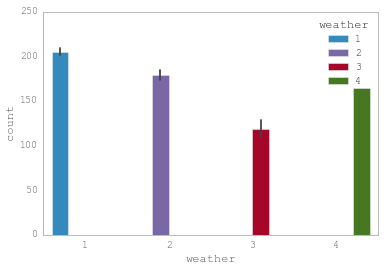

In [83]:
sns.barplot(x="weather", y="count", hue = "weather", data=train1)

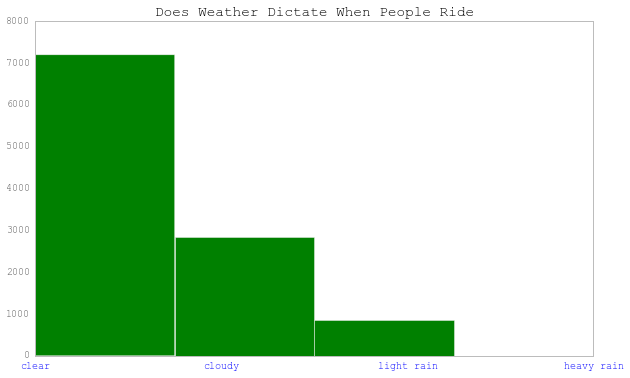

In [84]:
# Histogram showing the four categories of the days when people ride bikes
plt.figure(figsize=(10, 6))
plt.hist(train1["weather"], bins = 4, color='green')
plt.xticks([1,2,3,4],['clear','cloudy','light rain','heavy rain'], color = "blue")
plt.title('Does Weather Dictate When People Ride', color = "black")
plt.grid(False)
plt.show()

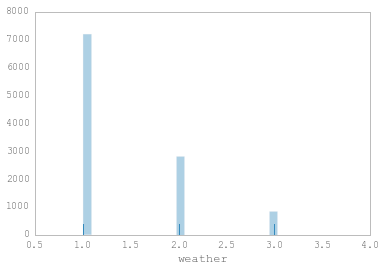

In [85]:
sns.distplot(train1["weather"], kde=False, rug=True);

In [86]:
from ggplot import *

In [87]:
ts = train1.set_index(['month'])
ts.head(5)
#ts.groupby(ts.index.month).sum().head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,year
month,,,,,,,,,,,,,,
1,2011-01-01 00:00:00,1,0,0,1,49.712,57.911,81,0,3,13,16,0,2011
1,2011-01-01 01:00:00,1,0,0,1,48.236,56.543,80,0,8,32,40,1,2011
1,2011-01-01 02:00:00,1,0,0,1,48.236,56.543,80,0,5,27,32,2,2011
1,2011-01-01 03:00:00,1,0,0,1,49.712,57.911,75,0,3,10,13,3,2011
1,2011-01-01 04:00:00,1,0,0,1,49.712,57.911,75,0,0,1,1,4,2011


In [88]:
ts.tail(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,year
month,,,,,,,,,,,,,,
12,2012-12-19 19:00:00,4,0,1,1,60.044,67.451,50,26.0027,7,329,336,19,2012
12,2012-12-19 20:00:00,4,0,1,1,58.568,63.365,57,15.0013,10,231,241,20,2012
12,2012-12-19 21:00:00,4,0,1,1,57.092,60.638,61,15.0013,4,164,168,21,2012
12,2012-12-19 22:00:00,4,0,1,1,57.092,63.365,61,6.0032,12,117,129,22,2012
12,2012-12-19 23:00:00,4,0,1,1,55.616,61.997,66,8.9981,4,84,88,23,2012


In [89]:
#Prepare the dataframe for grouping on date
train["datetime"] = pd.to_datetime(train["datetime"])
train.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40


In [90]:
train['datetime_minus_time'] = train["datetime"].apply(lambda train: datetime.datetime(year=train.year, month=train.month, day=train.day))
train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime_minus_time
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16,2011-01-01
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40,2011-01-01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0,5,27,32,2011-01-01


In [91]:
train.set_index(train["datetime_minus_time"],inplace=True)
train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime_minus_time
datetime_minus_time,,,,,,,,,,,,,
2011-01-01,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16,2011-01-01
2011-01-01,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40,2011-01-01
2011-01-01,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0,5,27,32,2011-01-01


In [92]:
datetime.__doc__

'Fast implementation of the datetime type.'

In [93]:
## Exploring the datetime module.

#datetime?

In [95]:
#Get our data
avg_counts_per_month = train["count"].resample("M", how="sum")
avg_counts_per_month.head()

datetime_minus_time
2011-01-31             23552
2011-02-28             32844
2011-03-31             38735
2011-04-30             50517
2011-05-31             79713
Freq: M, Name: count, dtype: int64

In [96]:
xticks = [k.strftime('%b %Y') for k in list(avg_counts_per_month.index)]

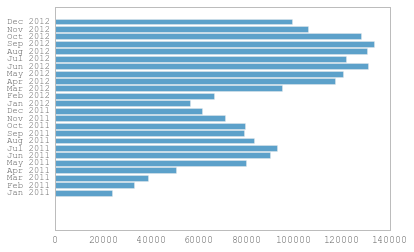

In [100]:
## plotting
plt.barh([x for x in range(len(xticks))], list(avg_counts_per_month), align='center', alpha=0.8)
plt.yticks([x for x in range(len(xticks))], xticks,fontsize=9)
plt.show()

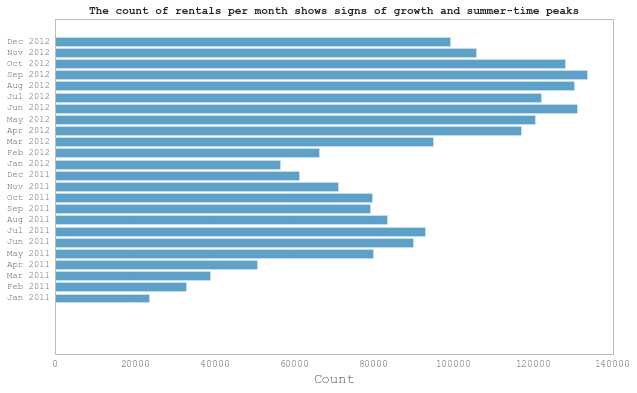

In [103]:
plt.figure(figsize=(10, 6))
plt.barh([x for x in range(len(xticks))], list(avg_counts_per_month), align='center', alpha=0.8)
plt.yticks([x for x in range(len(xticks))], xticks,fontsize=9)
plt.xlabel("Count", fontsize=14)
plt.title("The count of rentals per month shows signs of growth and summer-time peaks", fontsize=11, fontweight='bold')
plt.gca().xaxis.grid(True,linestyle='-',alpha=0.1)
plt.gca().yaxis.grid(True,alpha=0.4)
plt.savefig("average-monthly-rental-counts.png")
plt.show()

In [109]:
train1.set_index(train1["datetime"],inplace=True)
train1.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,year
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,49.712,57.911,81,0,3,13,16,0,1,2011
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,48.236,56.543,80,0,8,32,40,1,1,2011
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,48.236,56.543,80,0,5,27,32,2,1,2011


In [110]:
#Get our data
avg_counts_per_hour = train1["count"].resample("H", how="sum")
avg_counts_per_hour.head(5)

datetime
2011-01-01 00:00:00    16
2011-01-01 01:00:00    40
2011-01-01 02:00:00    32
2011-01-01 03:00:00    13
2011-01-01 04:00:00     1
Freq: H, Name: count, dtype: float64

In [126]:
weekday = []

for date in train1['datetime']:
    value = datetime.datetime.strptime(str(date),"%Y-%m-%d %H:%M:%S").strftime('%A')
    weekday.append(value)

In [127]:
train1['weekday'] = weekday

In [128]:
train1.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,year,weekday
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,49.712,57.911,81,0,3,13,16,0,1,2011,Saturday
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,48.236,56.543,80,0,8,32,40,1,1,2011,Saturday
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,48.236,56.543,80,0,5,27,32,2,1,2011,Saturday


In [147]:
hourly = train1.groupby(['hour','weekday']).sum()

In [148]:
hourly.head(10)

season  holiday  workingday  weather      temp     atemp  humidity  windspeed  casual  registered  count  month    year
hour weekday                                                                                                                           
0    Friday        160        2          62       86  4223.624  4600.742      4219   674.0535     621        2786   3407    419  128735
     Monday        166       10          55       88  4302.856  4714.534      4506   721.0473     672        1635   2307    431  130748
     Saturday      165        0           0       85  4300.908  4709.706      4346   643.0258    1094        5388   6482    433  132758
     Sunday        165        0           0       93  4346.664  4756.092      4488   731.0303    1153        5198   6351    429  132760
     Thursday      161        0          65       96  4298.428  4681.810      4366   745.9981     406        2030   2436    419  130748
     Tuesday       161        0          64       95  4334.324  4758.926      4451   712.0224     371        1378   1749    416  128736
     Wednesday     161        1          64       91  4324.996  4735.045      4600   642.0342     375        1981   2356    416  130748
1    Friday        160        2          62       91  4169.012  4536.653      4399   632.0378     309        1256   1565    419  128735
     Monday        166       10          55       87  4267.432  4688.641      4609   718.0323     340         835   1175    431  130748
     Saturday      165        0           0       93  4252.200  4652.448      4479   626.0145     750        3871   4621    433  132758

In [150]:
hourly = hourly.reset_index('weekday')
hourly.head(5)

,weekday,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,year
hour,,,,,,,,,,,,,,
0,Friday,160,2,62,86,4223.624,4600.742,4219,674.0535,621,2786,3407,419,128735
0,Monday,166,10,55,88,4302.856,4714.534,4506,721.0473,672,1635,2307,431,130748
0,Saturday,165,0,0,85,4300.908,4709.706,4346,643.0258,1094,5388,6482,433,132758
0,Sunday,165,0,0,93,4346.664,4756.092,4488,731.0303,1153,5198,6351,429,132760
0,Thursday,161,0,65,96,4298.428,4681.810,4366,745.9981,406,2030,2436,419,130748


In [151]:
hourly = hourly.reset_index('hour')
hourly.head(5)

,hour,weekday,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,year
0,0,Friday,160,2,62,86,4223.624,4600.742,4219,674.0535,621,2786,3407,419,128735
1,0,Monday,166,10,55,88,4302.856,4714.534,4506,721.0473,672,1635,2307,431,130748
2,0,Saturday,165,0,0,85,4300.908,4709.706,4346,643.0258,1094,5388,6482,433,132758
3,0,Sunday,165,0,0,93,4346.664,4756.092,4488,731.0303,1153,5198,6351,429,132760
4,0,Thursday,161,0,65,96,4298.428,4681.810,4366,745.9981,406,2030,2436,419,130748


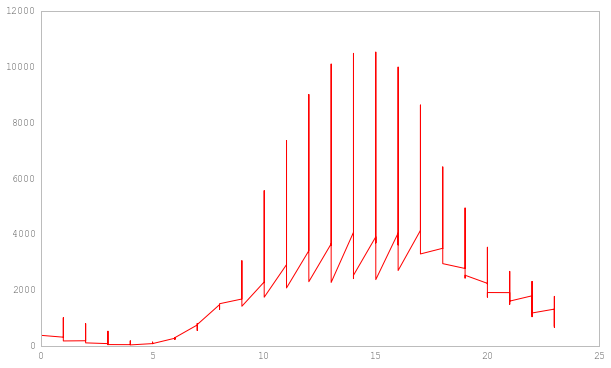

In [159]:
plt.figure(figsize=(10, 6))
plt.plot(hourly['hour'],hourly['casual'], color = 'red')

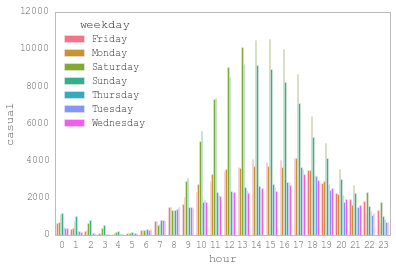

In [186]:
sns.barplot(x="hour", y="casual", hue="weekday", data=hourly);

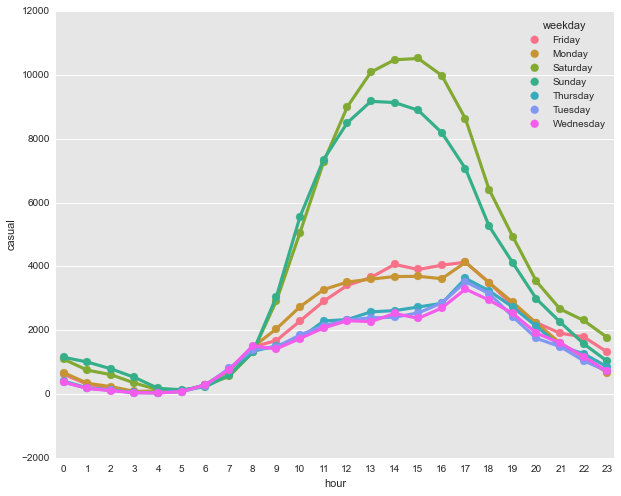

In [197]:
plt.figure(figsize=(10,8))
sns.pointplot(x="hour", y="casual", hue="weekday", data=hourly,);

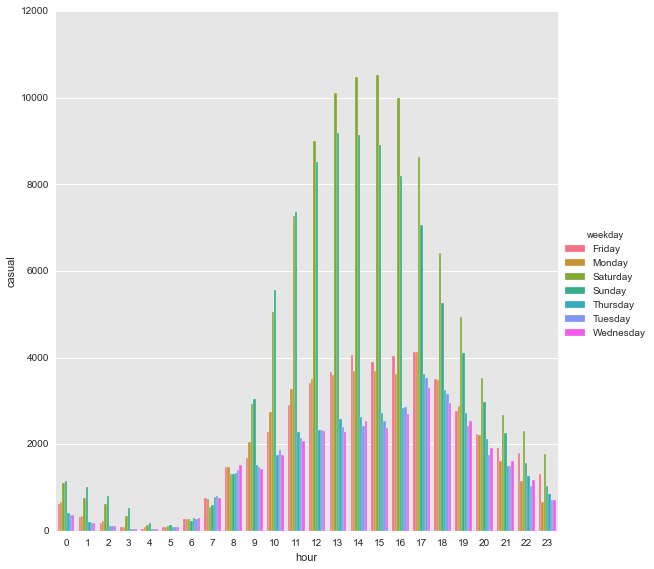

In [195]:
sns.set()
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(10, 8))
sns.factorplot(x="hour", y="casual", hue="weekday", data=hourly,size = 8)